In [80]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from scipy.integrate import odeint
from scipy.optimize import minimize
import scipy.stats as st
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit
from statsmodels.base.model import GenericLikelihoodModel
from scipy import stats
import seaborn as sns

pathName = os.getcwd()
print(pathName)

C:\Users\frank\GTREU\RandomForest


# Gather and Clean Data

In [81]:
dates = ['3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20','3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20','3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20','3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20','3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20','3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20','4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
        '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20','4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20','4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20','4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20','4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20','5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20','5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20','5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
        '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20','5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20','6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20','6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20','6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20','6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20','6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', 
         '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20','7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20','7/12/20', '7/13/20', '7/14/20', '7/15/20']
          
dates2 = ['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06','2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11','2020-03-12', '2020-03-13','2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17','2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
         '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01','2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06','2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11','2020-04-12', '2020-04-13','2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17','2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22','2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
         '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06','2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11','2020-05-12', '2020-05-13','2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17','2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22','2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
         '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01','2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06','2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11','2020-06-12', '2020-06-13','2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17','2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22','2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27','2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01','2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06','2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11','2020-07-12', '2020-07-13','2020-07-14', '2020-07-15']
    
dates3 = ['3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020','3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020', '3/11/2020','3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020','3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020','3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020', '3/26/2020','3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020', '3/31/2020',
        '4/1/2020', '4/2/2020', '4/3/2020', '4/4/2020', '4/5/2020', '4/6/2020','4/7/2020', '4/8/2020', '4/9/2020', '4/10/2020', '4/11/2020','4/12/2020', '4/13/2020', '4/14/2020', '4/15/2020', '4/16/2020','4/17/2020', '4/18/2020', '4/19/2020', '4/20/2020', '4/21/2020','4/22/2020', '4/23/2020', '4/24/2020', '4/25/2020', '4/26/2020','4/27/2020', '4/28/2020', '4/29/2020', '4/30/2020', '5/1/2020', 
        '5/2/2020', '5/3/2020', '5/4/2020', '5/5/2020', '5/6/2020','5/7/2020', '5/8/2020', '5/9/2020', '5/10/2020', '5/11/2020','5/12/2020', '5/13/2020', '5/14/2020', '5/15/2020', '5/16/2020','5/17/2020', '5/18/2020', '5/19/2020', '5/20/2020', '5/21/2020','5/22/2020', '5/23/2020', '5/24/2020', '5/25/2020', '5/26/2020','5/27/2020', '5/28/2020', '5/29/2020', '5/30/2020', '5/31/2020', 
        '6/1/2020', '6/2/2020', '6/3/2020', '6/4/2020', '6/5/2020', '6/6/2020','6/7/2020', '6/8/2020', '6/9/2020', '6/10/2020', '6/11/2020','6/12/2020', '6/13/2020', '6/14/2020', '6/15/2020', '6/16/2020','6/17/2020', '6/18/2020', '6/19/2020', '6/20/2020', '6/21/2020','6/22/2020', '6/23/2020', '6/24/2020', '6/25/2020', '6/26/2020','6/27/2020', '6/28/2020', '6/29/2020', '6/30/2020', '7/1/2020', 
        '7/2/2020', '7/3/2020', '7/4/2020', '7/5/2020', '7/6/2020','7/7/2020', '7/8/2020', '7/9/2020', '7/10/2020', '7/11/2020','7/12/2020', '7/13/2020', '7/14/2020', '7/15/2020']

# Scrape CSV file from JHU Github

# Cases
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df = pd.read_csv(url, index_col=0)

ny_temp = df.loc[(df['Province_State'] == 'New York')]
wash_temp = df.loc[(df['Province_State'] == 'Washington')]
cali_temp = df.loc[(df['Province_State'] == 'California')]
nj_temp = df.loc[(df['Province_State'] == 'New Jersey')]
mass_temp = df.loc[(df['Province_State'] == 'Massachusetts')]

us_temp = df.loc[(df['Country_Region'] == 'US')]

# Deaths
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
dfDeaths = pd.read_csv(url2, index_col=0)

ny_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'New York')]
wash_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'Washington')]
cali_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'California')]
nj_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'New Jersey')]
mass_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'Massachusetts')]

us_tempDeaths = dfDeaths.loc[(dfDeaths['Country_Region'] == 'US')]

# Recovered
url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dfRec = pd.read_csv(url3, index_col=0)
us_tempRec = dfRec.loc[(dfRec['Country/Region'] == 'US')]

### Oxford Policy Data

In [120]:
econ_index = pd.read_csv("OxCGRT_timeseries_index_economic.csv")
us_ec_index = econ_index.loc[(econ_index['CountryName'] == 'United States')]

health_index = pd.read_csv("OxCGRT_timeseries_index_health.csv")
us_health_index = health_index.loc[(health_index['CountryName'] == 'United States')]

gov_index = pd.read_csv("OxCGRT_timeseries_index_govresponse.csv")
us_gov_index = gov_index.loc[(gov_index['CountryName'] == 'United States')]

string_index = pd.read_csv("OxCGRT_timeseries_index_stringency.csv")
us_string_index = string_index.loc[(string_index['CountryName'] == 'United States')]

usEcon = []
for i in dates3:
    usEcon.append(us_ec_index[i].values[0])
    
usHealth = []
for i in dates3:
    usHealth.append(us_health_index[i].values[0])
    
usGov = []
for i in dates3:
    usGov.append(us_gov_index[i].values[0])

usString = []
for i in dates3:
    usString.append(us_string_index[i].values[0])

136


In [83]:
import glob

# Create an array of all the dataframes
policy = []

# Iterate through all files that aren't index ones
# and store each list in the policy list
for filepath in glob.iglob(r'*.csv', recursive=True):
    if 'OxCGRT_' in filepath and 'index' not in filepath:
        x = pd.read_csv(filepath)
        y = x.loc[(x['CountryName'] == 'United States')]
        z = []
        for i in dates3:
            z.append(x[i].values[0])
        policy.append(z)

### Apple Mobility Data

In [112]:
mobility = pd.read_csv("applemobilitytrends-2020-07-27.csv")
us_mob = mobility.loc[(mobility['region'] == 'United States')]
us_mob_transit = us_mob.loc[(us_mob['transportation_type'] == 'transit')]
us_mob_drive = us_mob.loc[(us_mob['transportation_type'] == 'driving')]
us_mob_walk = us_mob.loc[(us_mob['transportation_type'] == 'walking')]

mobility_car_us = []
for i in dates2:
    mobility_car_us.append(us_mob_drive[i].values[0])

mobility_walk_us = []
for i in dates2:
    mobility_walk_us.append(us_mob_walk[i].values[0])

mobility_trans_us = []
for i in dates2:
    mobility_trans_us.append(us_mob_transit[i].values[0])

136


### Aggregate Data

In [85]:
# Fill US array up with daily corona cases

popUS = 326690000

# United States
usa = []
usDeaths = []
usRec = []
k=0
tempI = 0
tempD = 0
tempR = 0
for i in dates:
    usaI = sum(us_temp[i]) - tempI
    usaD = sum(us_tempDeaths[i]) - tempD
    usaR = sum(us_tempRec[i]) - tempR
    tempusaR = sum(us_tempRec[i])
    tempusaI = sum(us_temp[i])
    tempusaD = sum(us_tempDeaths[i])
    usaS = popUS - tempusaR - tempusaI - tempusaD #nyI - nyD - nyR
    insert = usaI
    usDeaths.append(tempusaD)
    usRec.append(tempusaR)
    #insert = [usaS, usaI, tempusaR, tempusaD]#, nyI, nyD]
    usa.append(insert)
    tempI = tempusaI
    tempD = tempusaD
    tempR = tempusaR
    k += 1    

# Features

In [113]:
# Labels are values we predict
day = 136
labels = np.array(usa[0:day])

# We can now get feature list
feature = pd.DataFrame()
feature['econ'] = usEcon[0:day]
#feature['health'] = usHealth[0:day]
feature['gov'] = usGov[0:day]
#feature['stringency'] = usString[0:day]
x = np.nan_to_num(mobility_trans_us)
feature['transit'] = x[0:day]
y = np.nan_to_num(mobility_car_us)
feature['car'] = y[0:day]
z = np.nan_to_num(mobility_walk_us)
feature['walk'] = z[0:day]
feature['deaths'] = usDeaths[0:day]
feature['recovery'] = usRec[0:day]
feature['day'] = list(range(0,day,1))
feature['contact'] = policy[0][0:day]
feature['debtrelief'] = policy[1][0:day]
feature['domtravel'] = policy[2][0:day]
feature['incomesupp'] = policy[3][0:day]
feature['inttravel'] = policy[4][0:day]
feature['pubevents'] = policy[5][0:day]
feature['pubgatherings'] = policy[6][0:day]
feature['pubinfo'] = policy[7][0:day]
feature['pubtransport'] = policy[8][0:day]
feature['school'] = policy[9][0:day]
feature['stayhome'] = policy[10][0:day]
feature['testing'] = policy[11][0:day]
feature['work'] = policy[12][0:day]

# Save names
feature_list = list(feature.columns)

# Convert to np array
features = np.array(feature)

# Training and Test Sets

In [134]:
# Use Skicit-learn to split data
from sklearn.model_selection import train_test_split

# Split the data
end_pred = 121
train_features = features[0:end_pred]
test_features = features[end_pred:136]
train_labels = labels[0:end_pred]
test_labels = labels[end_pred:136]

# Use train_test_split
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
#                                                                            test_size = 0.25, random_state = 42)
#end_pred = train_features.shape[0]

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (121, 21)
Training Labels Shape: (121,)
Testing Features Shape: (15, 21)
Testing Labels Shape: (15,)


# Train Model

In [135]:
# Import random forest model
from sklearn.ensemble import RandomForestRegressor

# Begin model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [136]:
rf_new = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

# Predict

In [137]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictions_fit = rf.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(predictions)

Mean Absolute Error: 14186.44 degrees.
[43741.212 44158.496 44303.855 41525.396 41061.631 42508.824 43785.316
 43789.291 43869.142 44364.826 44322.47  41285.868 43268.403 43862.759
 43843.872]


In [138]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 76.43 %.


### Plot

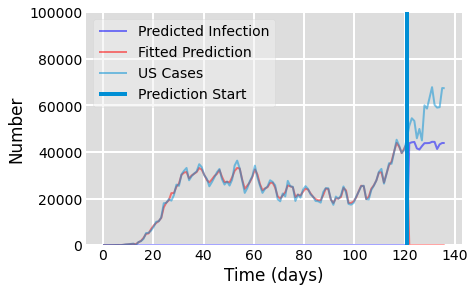

In [139]:
days = 136
t = np.linspace(0, days, days)

predi = [0]*(days-len(predictions))
for i in predictions.tolist():
    predi.append(i)

predi_fit = []
for i in predictions_fit.tolist():
    predi_fit.append(i)
for i in range(days-len(predi_fit)):
    predi_fit.append(0)
    
# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, predi, 'b', alpha=0.5, lw=2, label='Predicted Infection')
ax.plot(t, predi_fit, 'r', alpha=0.5, lw=2, label='Fitted Prediction')
ax.plot(t, usa[0:days], alpha=0.5, lw=2, label='US Cases')
ax.axvline(x=len(predictions_fit), ymin=0, ymax=500, label="Prediction Start")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number')
ax.set_ylim(0,100000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [93]:
from statsmodels.nonparametric.smoothers_lowess import lowess as lowess

t = list(range(end_pred,120,1))
t_fit = list(range(0,end_pred,1))

ss1 = lowess(predictions, t, frac=0.15)
ss2 = lowess(predictions_fit, t_fit, frac=0.15)

ss1[:10,:] # We get back smoothed y value for each x value in the data

array([[  100.   , 20211.901],
       [  101.   , 21604.26 ],
       [  102.   , 22402.782],
       [  103.   , 22402.782],
       [  104.   , 18670.735],
       [  105.   , 20409.411],
       [  106.   , 21921.427],
       [  107.   , 22268.516],
       [  108.   , 22556.152],
       [  109.   , 22402.782]])

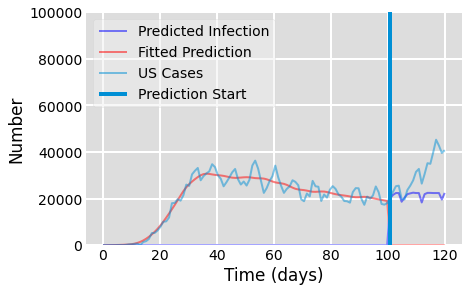

In [94]:
days = 120
t = np.linspace(0, days, days)

predi = [0]*(days-len(ss1))
prediMSE = []
for i in ss1:
    predi.append(i[1])
    prediMSE.append(i[1])
    
predi_fit = []
for i in ss2:
    predi_fit.append(i[1])
for i in range(days-len(predi_fit)):
    predi_fit.append(0)

# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, predi, 'b', alpha=0.5, lw=2, label='Predicted Infection')
ax.plot(t, predi_fit, 'r', alpha=0.5, lw=2, label='Fitted Prediction')
ax.plot(t, usa[0:days], alpha=0.5, lw=2, label='US Cases')
ax.axvline(x=end_pred+0.7, ymin=0, ymax=500, label="Prediction Start")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number')
ax.set_ylim(0,100000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

### Evaluate Fit

In [95]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(usa[end_pred:120],prediMSE))

MSE = np.square(np.subtract(usa[end_pred:120],prediMSE)).mean()

print(MSE)

134311560.2292579
134311560.2292579


# Find Most Important Factors

In [96]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: recovery             Importance: 0.27
Variable: day                  Importance: 0.24
Variable: deaths               Importance: 0.23
Variable: work                 Importance: 0.07
Variable: gov                  Importance: 0.06
Variable: econ                 Importance: 0.04
Variable: transit              Importance: 0.02
Variable: walk                 Importance: 0.02
Variable: car                  Importance: 0.01
Variable: domtravel            Importance: 0.01
Variable: contact              Importance: 0.0
Variable: debtrelief           Importance: 0.0
Variable: incomesupp           Importance: 0.0
Variable: inttravel            Importance: 0.0
Variable: pubevents            Importance: 0.0
Variable: pubgatherings        Importance: 0.0
Variable: pubinfo              Importance: 0.0
Variable: pubtransport         Importance: 0.0
Variable: school               Importance: 0.0
Variable: stayhome             Importance: 0.0
Variable: testing              Importance: 0.0


136


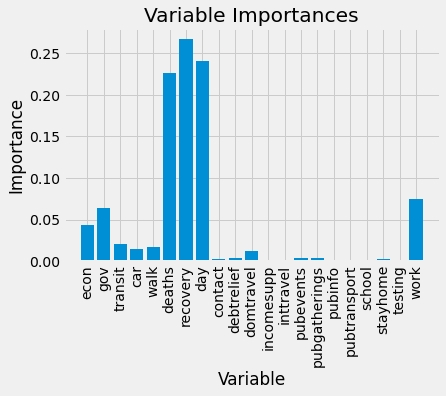

In [111]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

# Generate CSVs of Predictions

In [143]:
# Fit model to United States with different prediction start dates

# Init empty predictions dictionary
predictions = {}
predictions_2 = {}

for i in range(91, len(dates)-15):
    # Split the data
    end_pred = i
    train_features = features[0:end_pred]
    test_features = features[end_pred:end_pred+7]
    train_labels = labels[0:end_pred]
    test_labels = labels[end_pred:end_pred+7]
    
    # Begin model 
    rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
    # Train model on training data
    rf.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    pre = rf.predict(test_features)
    
    # Add these prediction infected values into dictionary
    predictions[dates[i]] = pre
    
    # Split the data
    end_pred = i
    train_features = features[0:end_pred]
    test_features = features[end_pred:end_pred+14]
    train_labels = labels[0:end_pred]
    test_labels = labels[end_pred:end_pred+14]
    
    # Begin model 
    rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
    # Train model on training data
    rf.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    pre = rf.predict(test_features)
    
    # Add these prediction infected values into dictionary
    predictions_2[dates[i]] = pre

In [145]:
from datetime import datetime

# Put all the data into the desired format
quant = []
loca = []
targ = []
forc = []
poin = []
end_date = []
keys = []

for key, value in predictions.items():
    keys.append(key)

forc_keys = keys + ["7/1/20", "7/2/20", "7/3/20", "7/4/20", "7/5/20", "7/6/20", "7/7/20", "7/8/20", "7/9/20", "7/10/20", "7/11/20", "7/12/20", "7/13/20", "7/14/20"]
    
# Loop through and situate everything correctly
j = 0
for i in range(len(keys)):
    x = datetime.strptime(keys[i], '%m/%d/%y')
    forc_date = x.strftime('%Y-%m-%d')
    point_date = keys[i]
    for k in range(7):
        quant.append("NA")
        loca.append("US")
        targ.append("1 wk ahead inc case")
        forc.append(forc_date)
        # Make sure point predictions are end dates are iterated
        poin.append(predictions[point_date][k])
        y = datetime.strptime(forc_keys[j+k], '%m/%d/%y')
        end_date.append(y.strftime('%Y-%m-%d'))
        
    for s in range(14):
        quant.append("NA")
        loca.append("US")
        targ.append("2 wk ahead inc case")
        forc.append(forc_date)
        # Make sure point predictions are end dates are iterated
        poin.append(predictions_2[point_date][s])
        y = datetime.strptime(forc_keys[j+s], '%m/%d/%y')
        end_date.append(y.strftime('%Y-%m-%d'))
        
    j = j + 1
        
# Instantiate the output CSV dictionary
output_csv = {"location" : loca, 
              "target" : targ,
             "target_end_date" : end_date,
             "forecast_date" : forc,
             "point" : poin,
             "quantile" : quant}

# convert to pandas dataframe for easy transfer to CSV
out = pd.DataFrame(output_csv)

In [151]:
# Iterate through and create separate CSV files for each forecast date
# Also reformat dates to correct format
for i in dates[91:len(dates)-15]:
    z = datetime.strptime(i, '%m/%d/%y')
    z_date = z.strftime('%Y-%m-%d')
    to_file = out[out["forecast_date"] == z_date]
    to_file.to_csv(f'{z_date}-Random-Forest.csv') 

In [149]:
# Example of one of the CSV files
out[out["forecast_date"] == "2020-06-20"]

,location,target,target_end_date,forecast_date,point,quantile
399,US,1 wk ahead inc case,2020-06-20,2020-06-20,28745.621,NA
400,US,1 wk ahead inc case,2020-06-21,2020-06-20,20409.412,NA
401,US,1 wk ahead inc case,2020-06-22,2020-06-20,27212.143,NA
402,US,1 wk ahead inc case,2020-06-23,2020-06-20,28107.550,NA
403,US,1 wk ahead inc case,2020-06-24,2020-06-20,28675.967,NA
404,US,1 wk ahead inc case,2020-06-25,2020-06-20,28750.969,NA
405,US,1 wk ahead inc case,2020-06-26,2020-06-20,29816.811,NA
406,US,2 wk ahead inc case,2020-06-20,2020-06-20,28745.621,NA
407,US,2 wk ahead inc case,2020-06-21,2020-06-20,20409.412,NA
408,US,2 wk ahead inc case,2020-06-22,2020-06-20,27212.143,NA
